<table>
<tr>                                                                                   
     <th>
         <div style='padding:15px;color:#030aa7;font-size:240%;text-align: center;font-style: italic;font-weight: bold;font-family: Georgia, serif'><a href="https://www.kaggle.com/datasets/loveall/cervical-cancer-risk-classification">Risque de cancer du col de l'utérus</a></div>
     </th>
     <th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/breast_cancer_logo.png" width="96"></th>
 </tr>
</table>

<div style='text-align: center'>
<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/CervicalCancer.jpg" width="1024">
</div>


# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Introduction</div></b>
## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Import libriries </div></b>

In [45]:
import pandas as pd, numpy as np, seaborn as sns, warnings, os, sys, time, copy as cp, pickle,re
from datetime import datetime as dt
from matplotlib import pyplot as plt

import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects

import plotly.express as px
import plotly.graph_objects as go

In [46]:
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans


from matplotlib.colors import ListedColormap
from itertools import cycle
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler,MinMaxScaler,label_binarize
from sklearn.feature_extraction import DictVectorizer
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeCV
from sklearn.svm import NuSVC, SVC, OneClassSVM
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, RationalQuadratic, ExpSineSquared, DotProduct, Matern, WhiteKernel

from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB
from lightgbm import LGBMClassifier
from xgboost  import XGBClassifier

from sklearn.metrics import make_scorer, confusion_matrix, roc_curve, auc, accuracy_score, log_loss, hamming_loss, \
                            precision_score, recall_score, f1_score, fbeta_score, jaccard_score, \
                            precision_recall_curve, average_precision_score, balanced_accuracy_score, \
                            classification_report, silhouette_score
from sklearn.metrics import roc_auc_score, zero_one_loss
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, RepeatedKFold, \
                                    RepeatedStratifiedKFold, LeavePOut, LeaveOneGroupOut, \
                                    LeavePGroupsOut, ShuffleSplit, StratifiedShuffleSplit, TimeSeriesSplit, GridSearchCV

from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier

from sklearn.neighbors  import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble   import IsolationForest
from sklearn.svm        import OneClassSVM

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Outils du document</div></b>

In [47]:
sys.path.append(os.path.abspath('../outils/'))
from prjFormation import palette

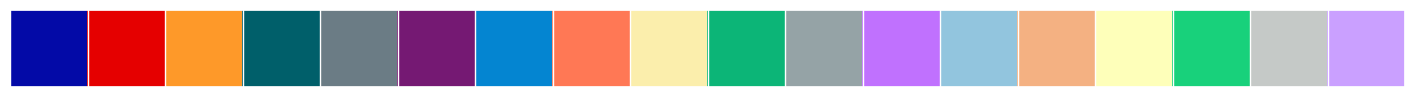

In [48]:
# palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", 
#             "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#c071fe", 
#             "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#dfc5fe", 
#           ]
sns.palplot(sns.color_palette(palette[:18]))

In [49]:
from prjFormation import initProjet,affichageDonnees2d,affichageDonnees3d,createLinkageMatrix, \
                         afficheDendrogram, affichageDistribution,afficheColonneCible, \
                         add_median_labels, formatPct, createColumnsQualitatives

In [50]:
from classificationBinaires import initDictionnaireClassificateurs, executionEssaiComparaisonClassificateurs,\
                                   affichageEvolutionMetriques, affichageROC, executeValidationCroisee,afficheSeparationsBinaires, \
                                   affichageEvolutionMetriquesC, executionEssaiComparaisonClassificateurs, calculMetriques, \
                                   essaiApprentissageComparaisonClassificateurs, affichageCourbesROCetPR, \
                                   initDictionnaireClassificateursC, calculRFECV, affichageEvolutionMetriquesTestVal

In [51]:
font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)

warnings.filterwarnings(action="ignore")
sns.set_style('darkgrid')
sns.set(font_scale=2)

In [52]:
projet = initProjet(repertoireRacine='.',nomProjet='CervicalCancerRisk')

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Démarche pour constituer un modèle de classification </div></b>

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/demarche.png" width="800">

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Lecture des données</div></b>

In [53]:
pd.read_csv('../donnees/Cervical Cancer Risk/kag_risk_factors_cervical_cancer.csv',
                      na_values='?')

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [54]:
donnees = pd.read_csv('../donnees/Cervical Cancer Risk/kag_risk_factors_cervical_cancer.csv',
                      na_values='?')
donnees.columns = list(map(lambda x: str(x).replace(':',' '),donnees.columns))
cible = 'Dx Cancer'
variableQuantitatives= ['Smokes (years)','Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)']
variableQualitatives = list(donnees.drop(columns=variableQuantitatives+[cible]).columns)
donnees.fillna(0,inplace=True)
donnees[variableQualitatives+[cible]] = donnees[variableQualitatives+[cible]].astype('int16')
donnees.reset_index(inplace=True)
donnees.set_index(['index',cible],inplace=True)
donnees.head()

,,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs Number of diagnosis,STDs Time since first diagnosis,STDs Time since last diagnosis,Dx CIN,Dx HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
index,Dx Cancer,,,,,,,,,,,,,,,,,,,,,
0,0,18,4,15,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,15,1,14,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,34,1,0,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,52,5,16,4,1,37.0,37.0,1,3.0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,46,3,21,4,0,0.0,0.0,1,15.0,0,...,0,0,0,0,0,0,0,0,0,0


# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Separation des données pour l'apprentissage</div></b>

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/echantillonApprentissageTest.png" width="800">

In [55]:
X = donnees.copy()
y = X.reset_index()[cible]
y.index = X.index

In [56]:
X_train, X_test, y_train, y_test = train_test_split( X, 
                                                     y, 
                                                     test_size=0.3, #train_size
                                                     random_state=0, 
                                                     stratify = y
                                                   ) 

In [57]:
donnees.loc[X_train.index,'échantillon'] = 'apprentissage'
donnees.loc[X_test.index ,'échantillon'] = 'test'
donnees.reset_index(inplace=True)
donnees.set_index(['échantillon','index',cible],inplace=True)

donnees.to_parquet(os.path.join(projet.repertoireDonnees,'donnees_echantillons.parquet'))

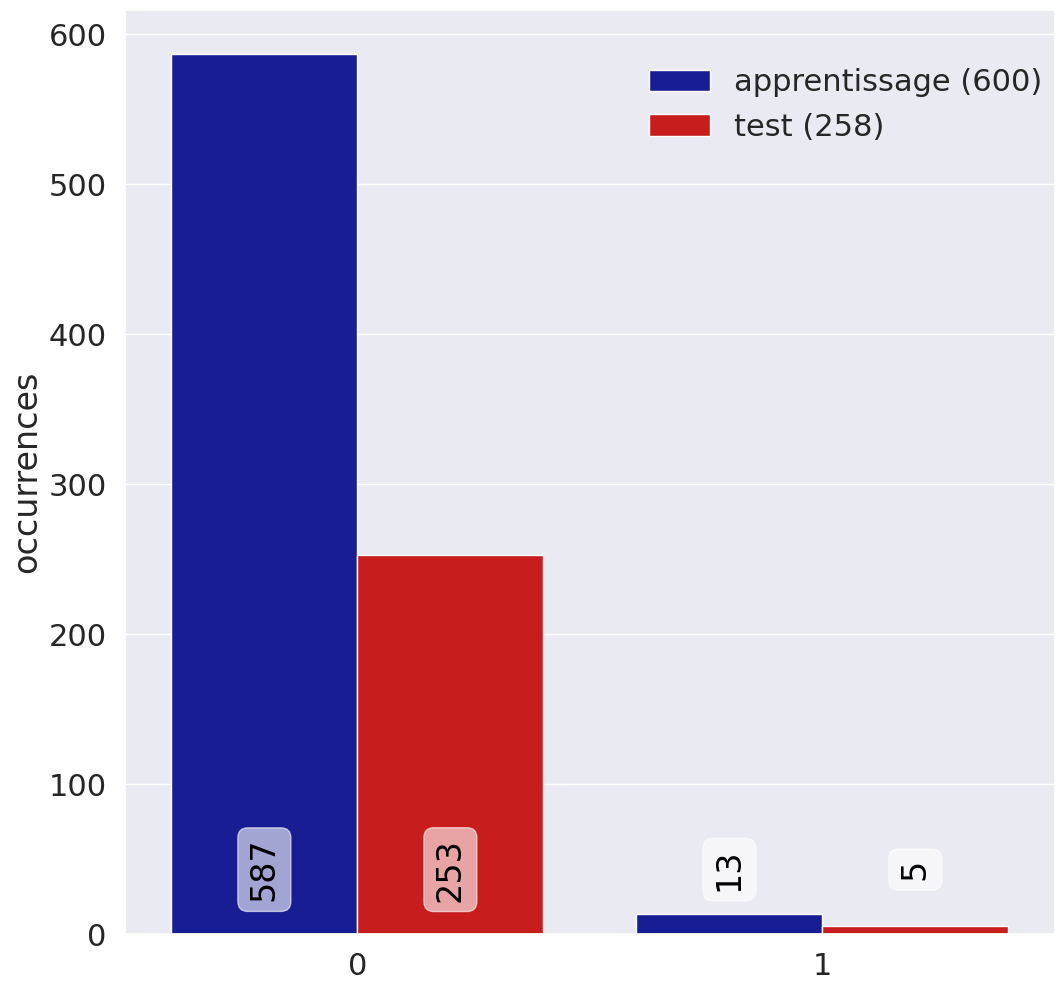

In [58]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(12,12))
afficheSeparationsBinaires(donnees, palette, ax, cible=cible)

In [59]:
X = donnees.copy()
y = donnees.reset_index()[cible]
y.index = X.index

In [60]:
X_train, X_test, y_train, y_test = X.loc[('apprentissage'),:],\
                                   X.loc[('test'),:],\
                                   y.loc[('apprentissage')],\
                                   y.loc[('test')] 

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Déclaration des classificateurs </div></b>

In [61]:
classificateursDict =  initDictionnaireClassificateursC(arbres=12)
# classificateursDict.pop('Random_Forest')
# classificateursDict.pop('AdaBoost')
classificateursDict.pop('LightGBM')
classificateursDict.pop('XGBoost')
# classificateursDict.pop('LogisticRegression')
classificateursDict.pop('Stochastic_GD')
classificateursDict.pop('Gaussian_Process')
classificateursDict.pop('Nearest_Neighbors')
classificateursDict.pop('Linear_SVM')
classificateursDict.pop('Linear_NuSVM')
classificateursDict.pop('Radial_NuSVM')
classificateursDict.pop('Poly_NuSVM')
classificateursDict.pop('GaussianNaiveBayes')
classificateursDict.pop('QuadraticDiscriminant')
classificateursDict.pop('Neural_Net')

{'classicateur': MLPClassifier(alpha=1), 'couleur': '#92c5de'}

In [62]:
classificateursDict

{'Random_Forest': {'classicateur': RandomForestClassifier(max_depth=6, max_features=3, min_samples_split=4,
                         n_estimators=12, n_jobs=-1),
  'couleur': '#030aa7'},
 'AdaBoost': {'classicateur': AdaBoostClassifier(n_estimators=12),
  'couleur': '#e50000'},
 'LogisticRegression': {'classicateur': LogisticRegression(C=0.81113, max_iter=3000, n_jobs=-1),
  'couleur': '#fe9929'}}

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Essai initial avec les donnes sans aucun traitement</div></b> 

Random_Forest         0.9845 -- Area under the ROC curve : 0.9984 -- Exécution : 0.11
AdaBoost              0.9922 -- Area under the ROC curve : 0.9945 -- Exécution : 0.02
LogisticRegression    0.9922 -- Area under the ROC curve : 1.0000 -- Exécution : 0.27
Exécution : 0.27


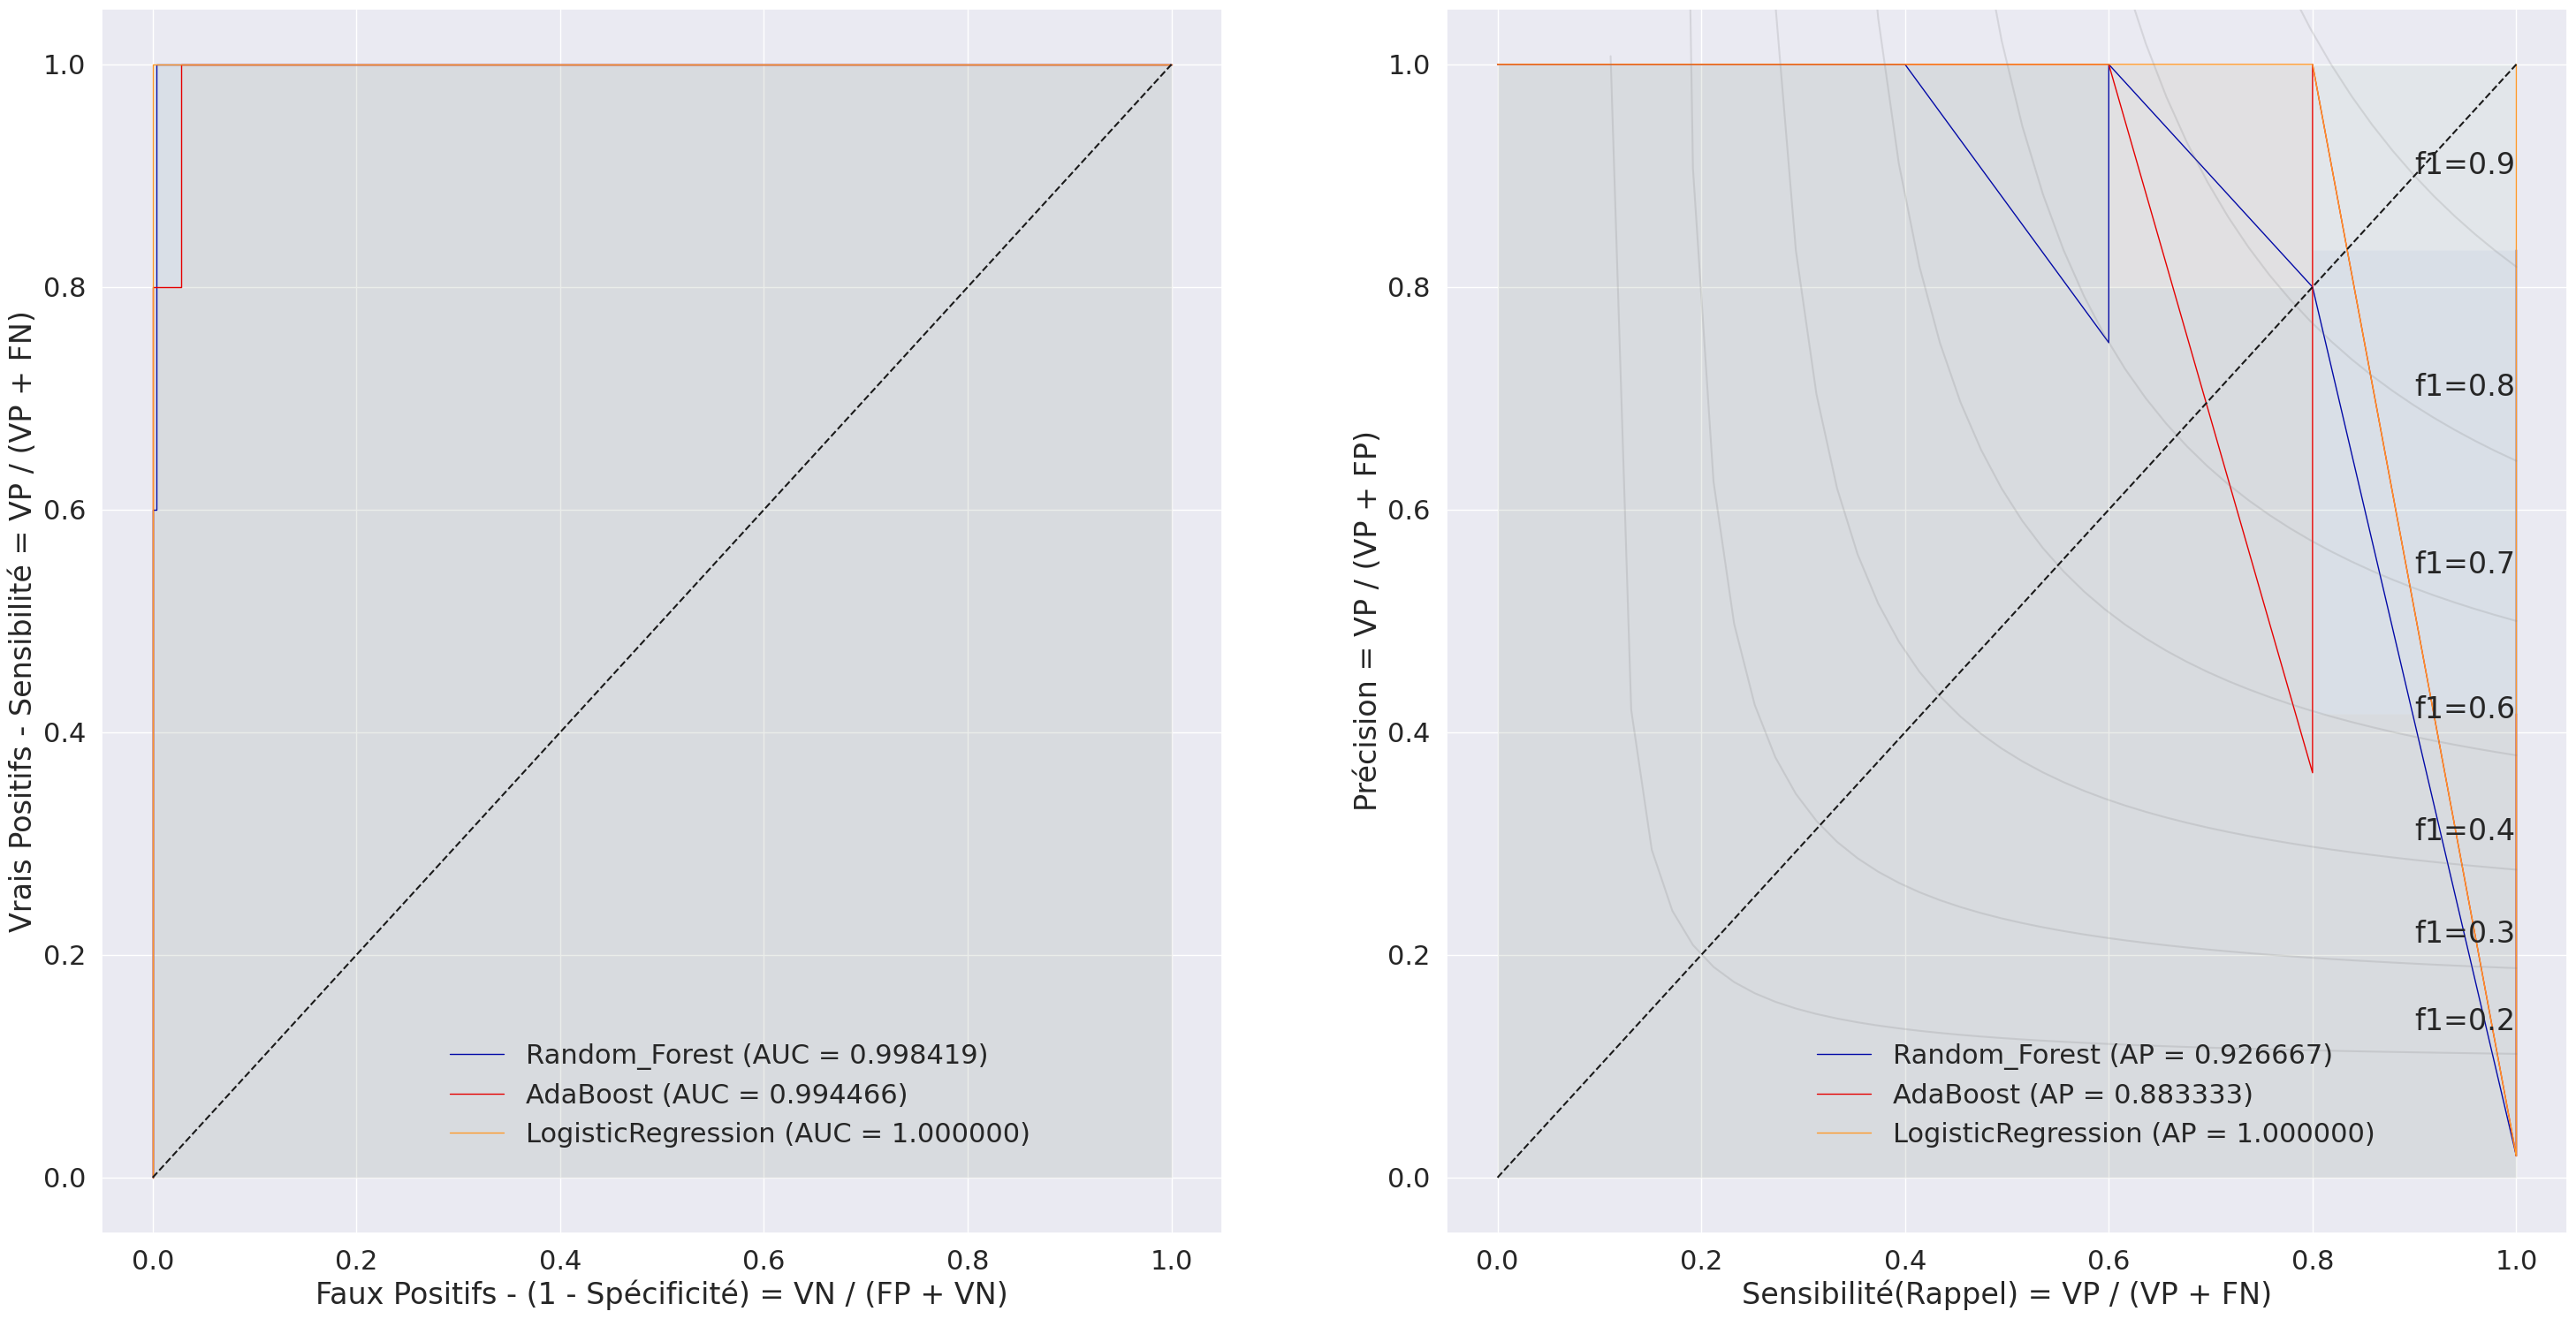

In [63]:
metriquesDF,resultatsDF,metriques,resultats  = \
              essaiApprentissageComparaisonClassificateurs( classificateursDict, 
                                                            X_train, 
                                                            y_train,
                                                            X_test, 
                                                            y_test, 
                                                            nom_essai = 'Initial',
                                                            apprentissage=True)
affichageCourbesROCetPR(metriques,resultats,classificateursDict)

In [64]:
metriquesDF['échantillon'] = 'test'
metriquesDF[metriquesDF['échantillon'] == 'test'].drop(columns=['vrais_positifs', 'vrais_negatifs',
                         'faux_positifs', 'faux_negatifs', 'fbeta05', 'fbeta2',
                         'hammingloss', 'matthews']).sort_values(['aucROC','f1'],ascending=False).head(28)

,avgPrecRec,aucROC,accuracy,logloss,precision,sensibilite,f1,jaccard,specificite,essai,échantillon
classicateur,,,,,,,,,,,
LogisticRegression,1.0,1.0,0.992248,0.279408,1.0,0.6,0.75,0.6,1.0,Initial,test
Random_Forest,0.926667,0.998419,0.984496,0.558816,1.0,0.2,0.333333,0.2,1.0,Initial,test
AdaBoost,0.883333,0.994466,0.992248,0.279408,1.0,0.6,0.75,0.6,1.0,Initial,test


# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Transformation des modalités en variables</div></b>

In [65]:
for colonne in variableQualitatives:
    createColumnsQualitatives(X,colonne)   

In [66]:
X_train, X_test, y_train, y_test = X.loc[('apprentissage'),:],\
                                   X.loc[('test'),:],\
                                   y.loc[('apprentissage')],\
                                   y.loc[('test')] 

Random_Forest         0.9806 -- Area under the ROC curve : 0.9929 -- Exécution : 0.05
AdaBoost              0.9922 -- Area under the ROC curve : 0.9976 -- Exécution : 0.02
LogisticRegression    0.9922 -- Area under the ROC curve : 1.0000 -- Exécution : 0.17
Exécution : 0.17


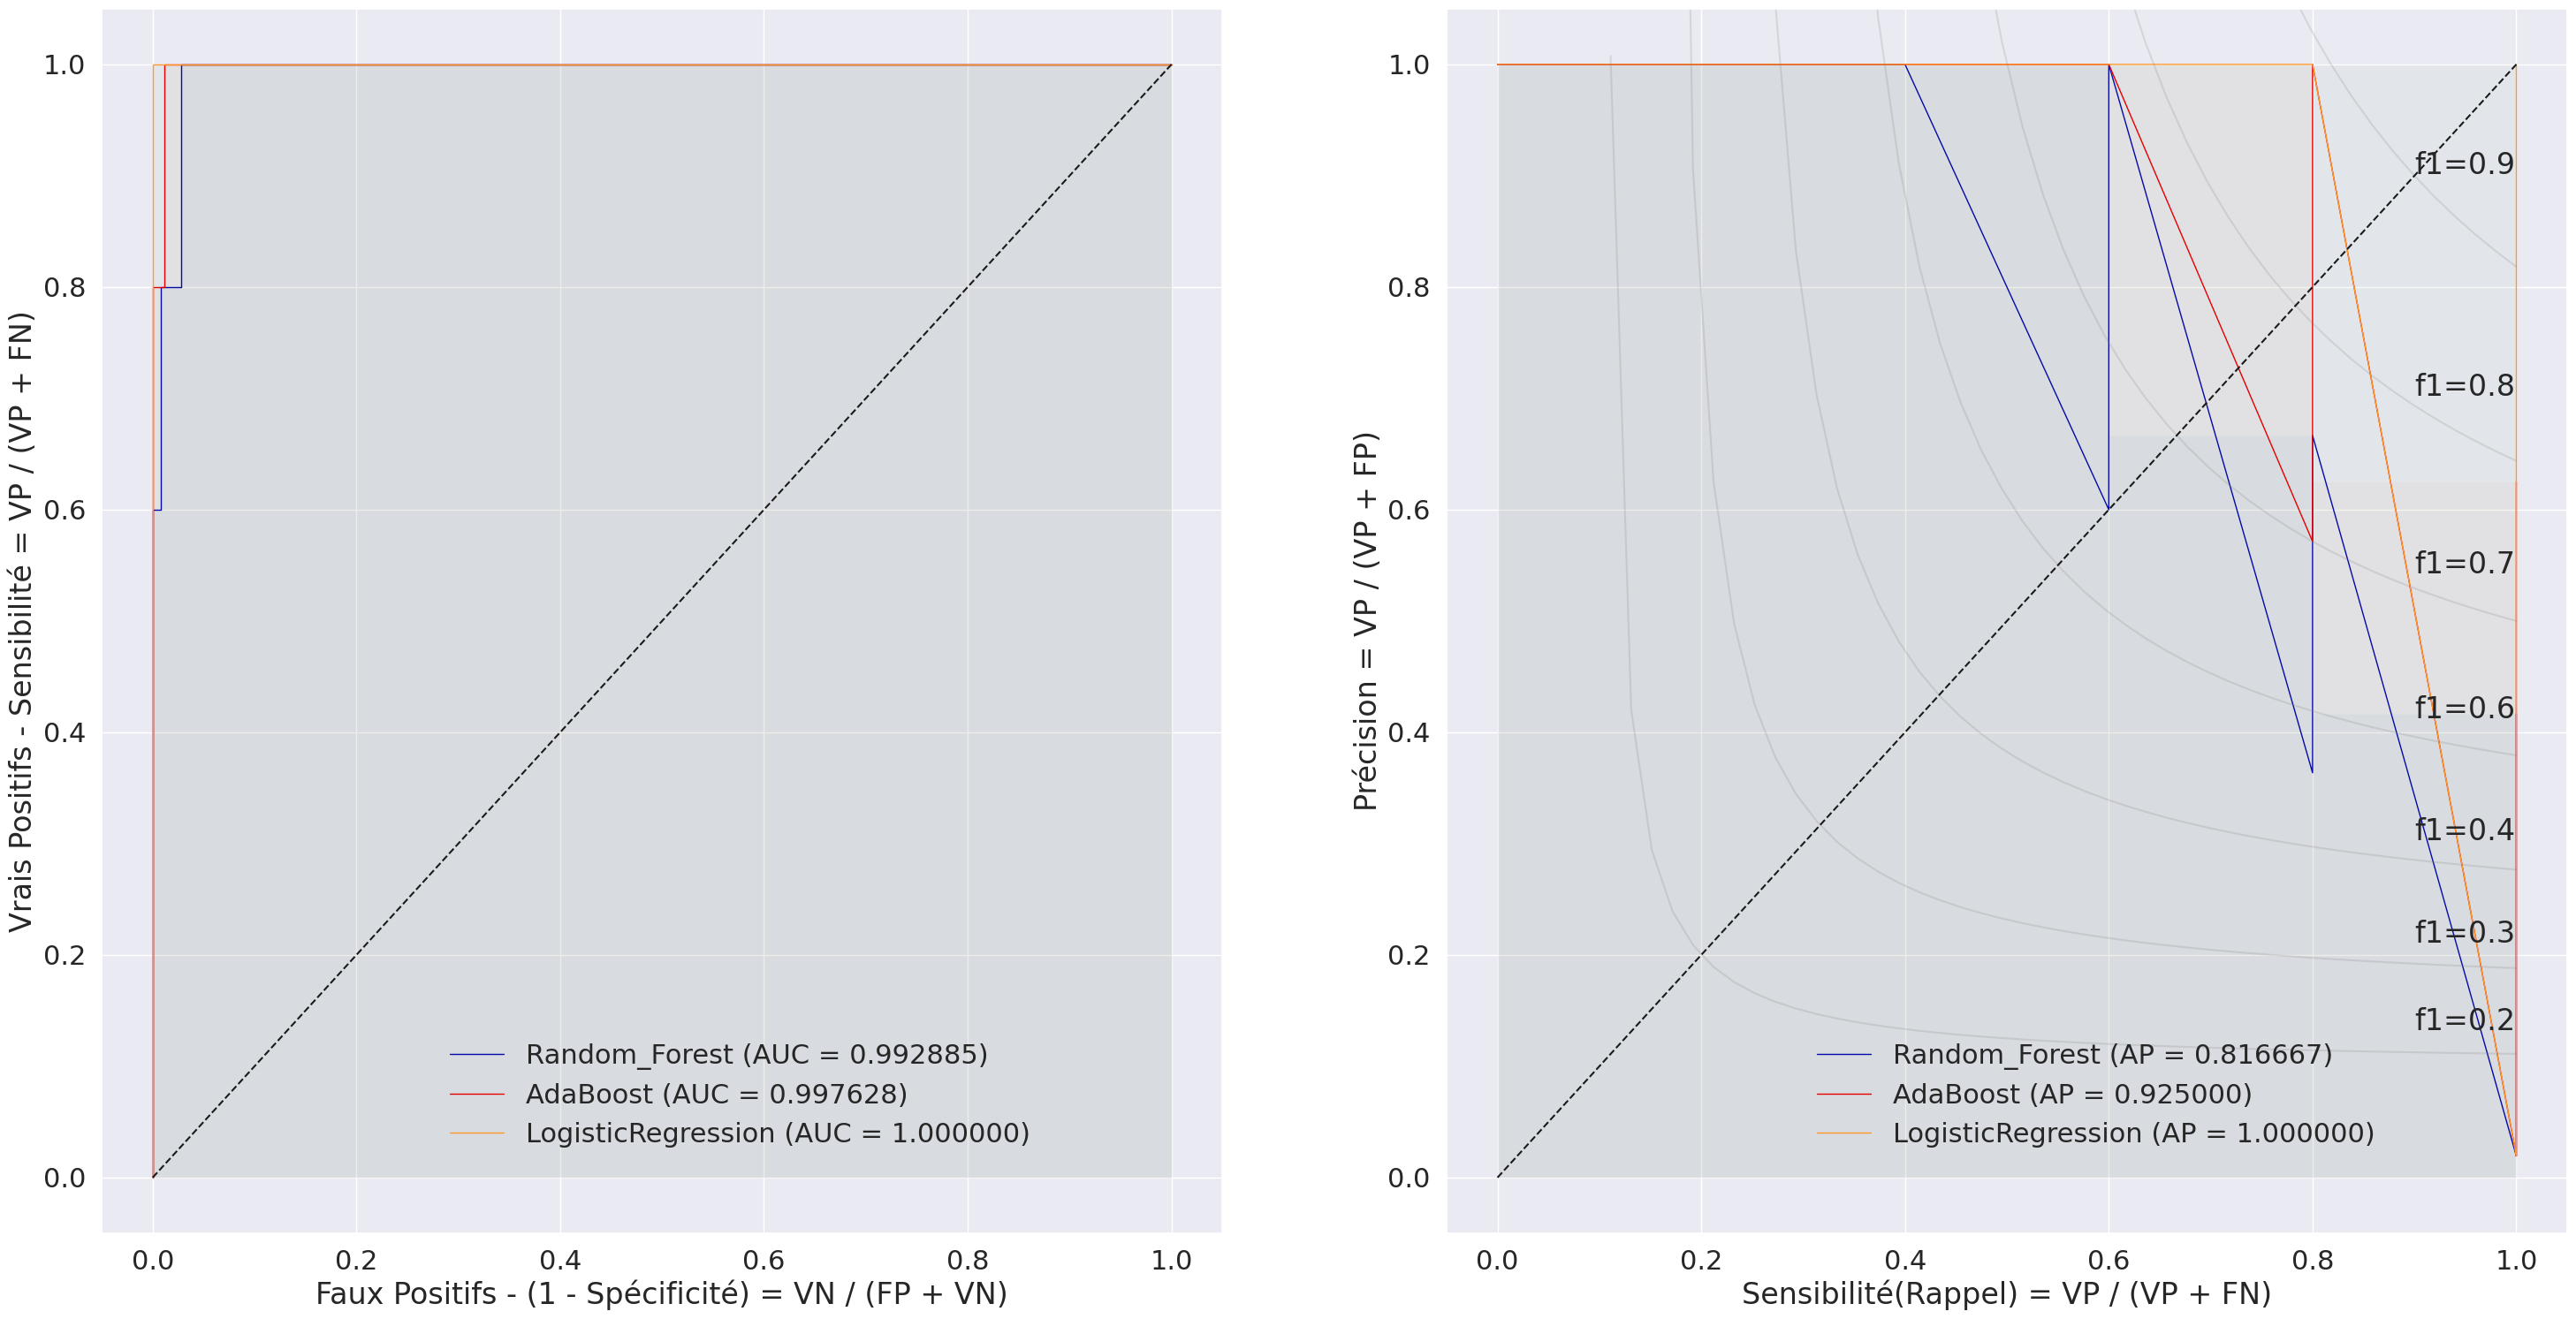

In [67]:
metriquesDFtemp,resultatsDFtemp,metriques,resultats  = \
              essaiApprentissageComparaisonClassificateurs( classificateursDict, 
                                                            X_train, 
                                                            y_train,
                                                            X_test, 
                                                            y_test, 
                                                            nom_essai = 'Modalités',
                                                            apprentissage=True)
affichageCourbesROCetPR(metriques,resultats,classificateursDict)

In [68]:
metriquesDFtemp['échantillon'] = 'test'
metriquesDF = pd.concat([metriquesDF,metriquesDFtemp])
metriquesDF[metriquesDF['échantillon'] == 'test'].drop(columns=['vrais_positifs', 'vrais_negatifs',
                         'faux_positifs', 'faux_negatifs', 'fbeta05', 'fbeta2',
                         'hammingloss', 'matthews']).sort_values(['aucROC','f1'],ascending=False).head(28)

,avgPrecRec,aucROC,accuracy,logloss,precision,sensibilite,f1,jaccard,specificite,essai,échantillon
classicateur,,,,,,,,,,,
LogisticRegression,1.0,1.0,0.992248,0.279408,1.0,0.6,0.75,0.6,1.0,Initial,test
LogisticRegression,1.0,1.0,0.992248,0.279408,1.0,0.6,0.75,0.6,1.0,Modalités,test
Random_Forest,0.926667,0.998419,0.984496,0.558816,1.0,0.2,0.333333,0.2,1.0,Initial,test
AdaBoost,0.925,0.997628,0.992248,0.279408,1.0,0.6,0.75,0.6,1.0,Modalités,test
AdaBoost,0.883333,0.994466,0.992248,0.279408,1.0,0.6,0.75,0.6,1.0,Initial,test
Random_Forest,0.816667,0.992885,0.98062,0.69852,0.0,0.0,0.0,0.0,1.0,Modalités,test


# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Centrage et réduction des données</div></b> 

<table>
<tr>
<th><img src="https://raw.githubusercontent.com/rbizoi/IntelligenceEnDonneesDeSante/refs/heads/main/images/moyenne.png"></th>
<th><img src="https://raw.githubusercontent.com/rbizoi/IntelligenceEnDonneesDeSante/refs/heads/main/images/ecart_type.png"></th>
<th><img src="https://raw.githubusercontent.com/rbizoi/IntelligenceEnDonneesDeSante/refs/heads/main/images/centrage_reduction.png"></th>
</tr>
</table>

In [69]:
modelStd = StandardScaler()
modelStd.fit(X_train[variableQuantitatives])

StandardScaler()

In [70]:
X_train[variableQuantitatives] = modelStd.transform(X_train[variableQuantitatives])
X_test[variableQuantitatives] = modelStd.transform(X_test[variableQuantitatives])

Random_Forest         0.9806 -- Area under the ROC curve : 0.9992 -- Exécution : 0.11
AdaBoost              0.9922 -- Area under the ROC curve : 0.9976 -- Exécution : 0.02
LogisticRegression    0.9922 -- Area under the ROC curve : 1.0000 -- Exécution : 0.17
Exécution : 0.17


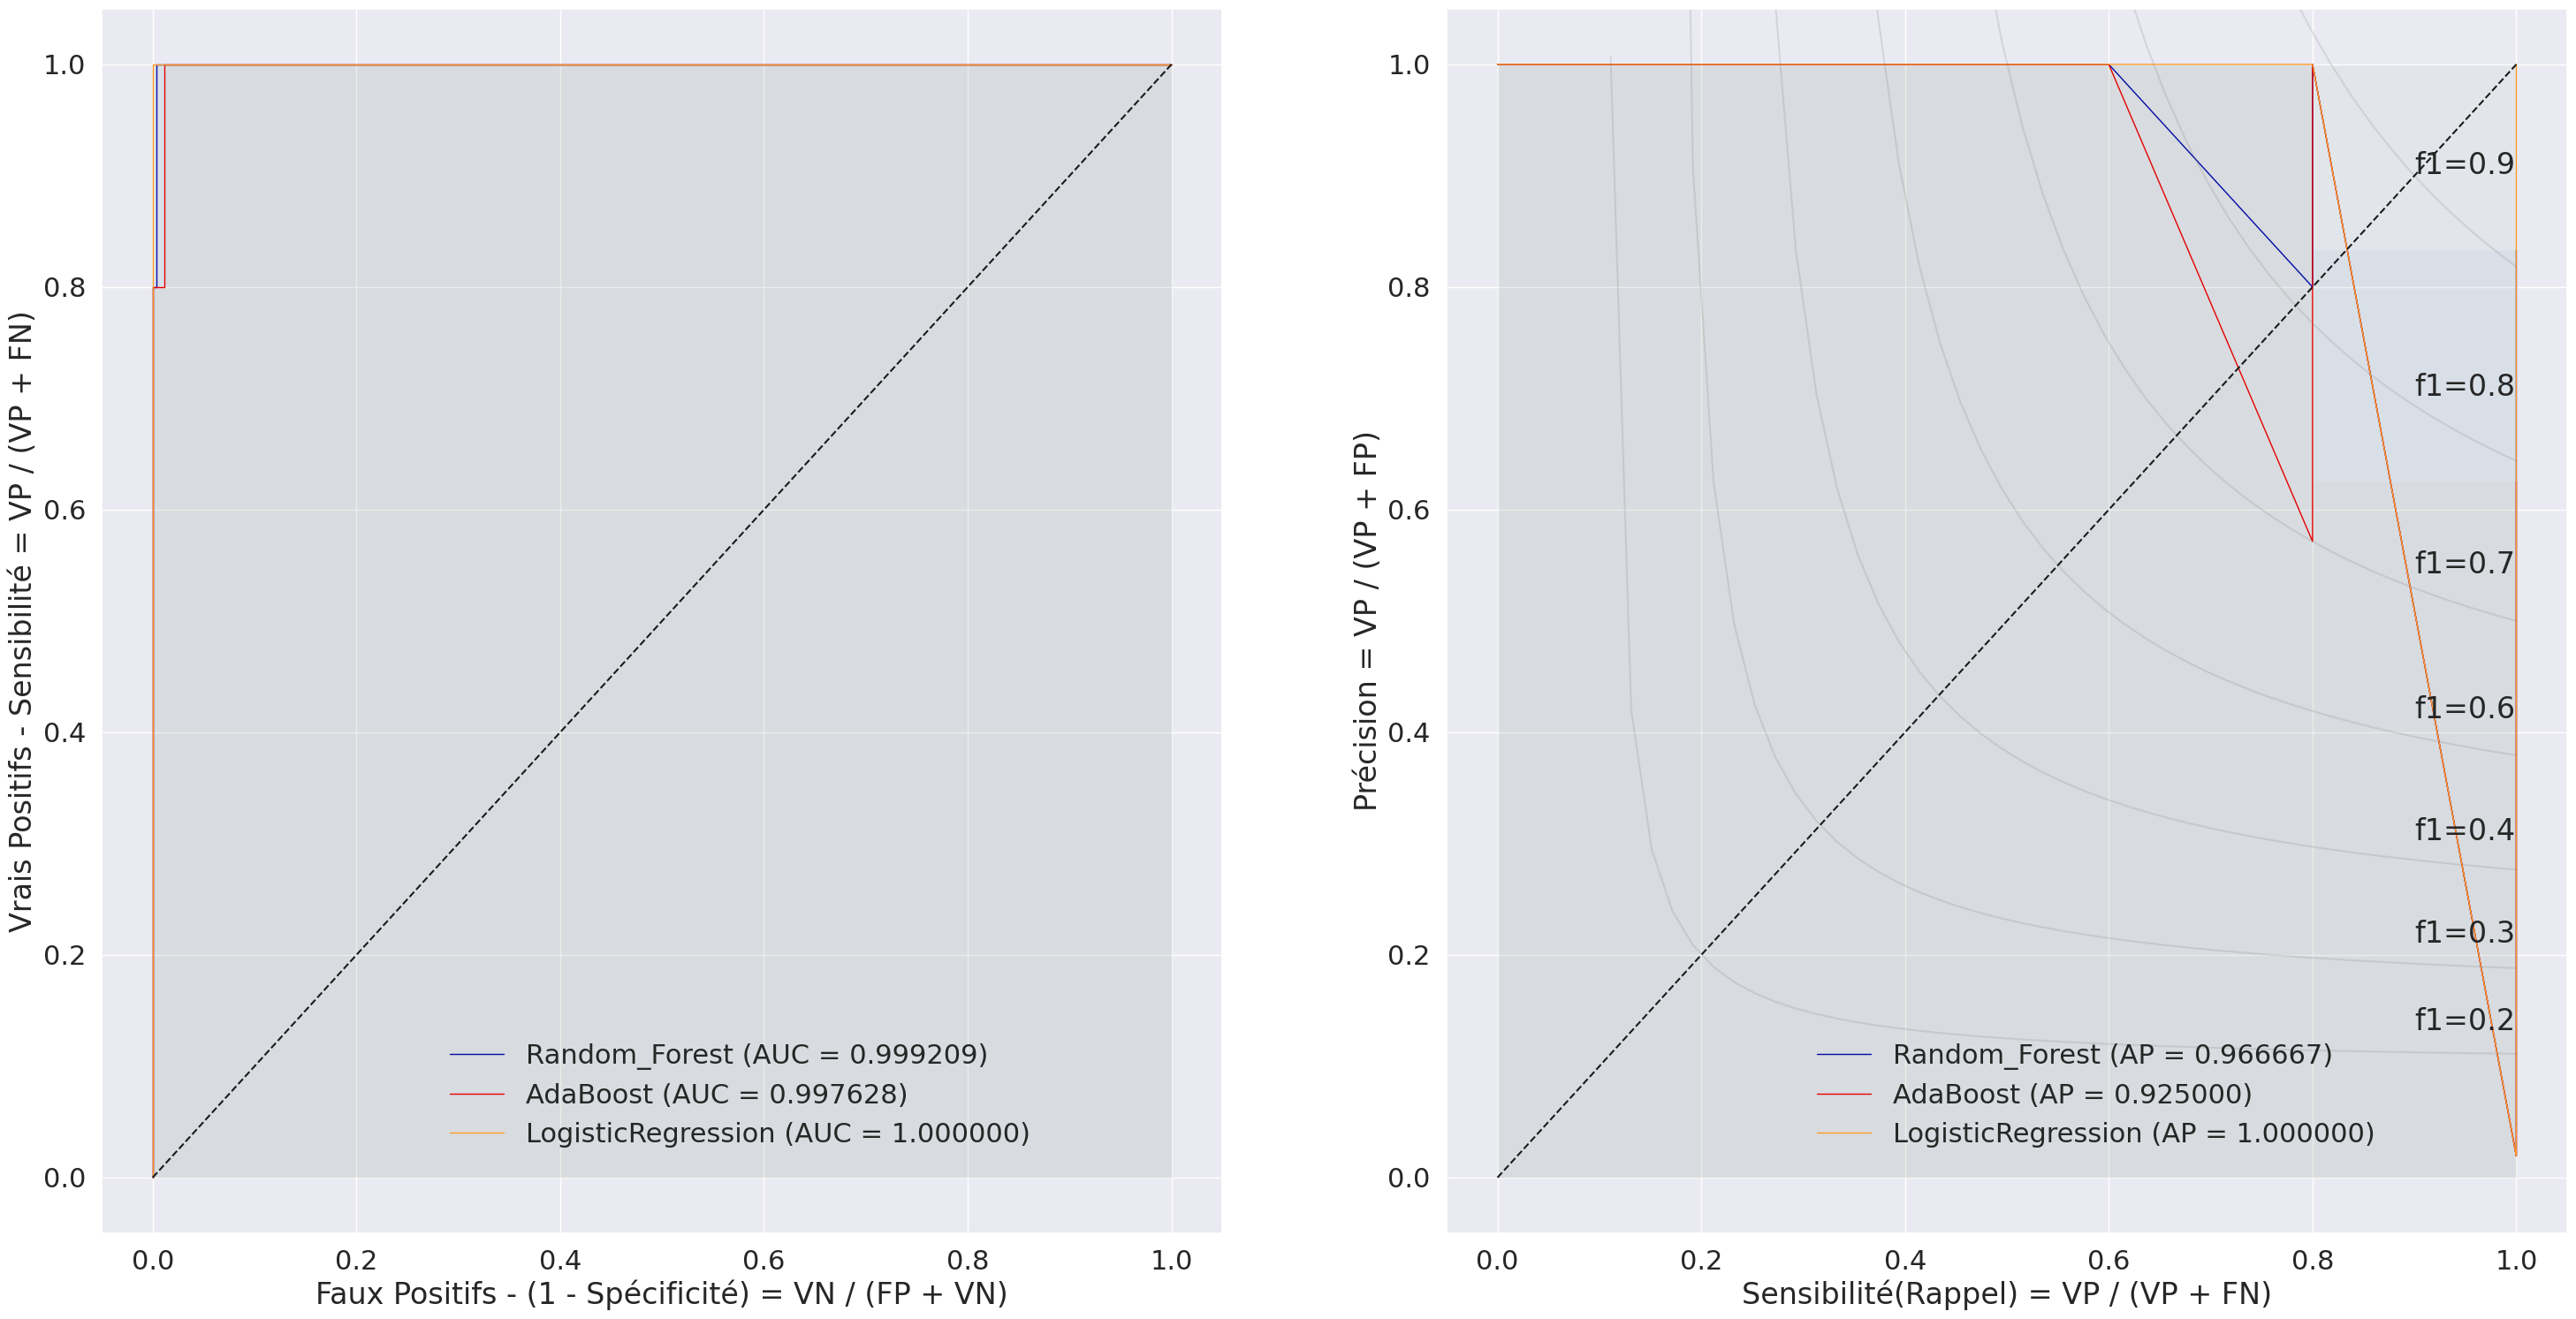

In [71]:
metriquesDFtemp,resultatsDFtemp,metriques,resultats  = \
              essaiApprentissageComparaisonClassificateurs( classificateursDict, 
                                                            X_train, 
                                                            y_train,
                                                            X_test, 
                                                            y_test, 
                                                            nom_essai='Modalités+StandardScaler',
                                                            apprentissage=True)
affichageCourbesROCetPR(metriques,resultats,classificateursDict)

In [72]:
metriquesDFtemp['échantillon'] = 'test'
metriquesDF = pd.concat([metriquesDF,metriquesDFtemp])
metriquesDF[metriquesDF['échantillon'] == 'test'].drop(columns=['vrais_positifs', 'vrais_negatifs',
                         'faux_positifs', 'faux_negatifs', 'fbeta05', 'fbeta2',
                         'hammingloss', 'matthews']).sort_values(['aucROC','f1'],ascending=False).head(28)

,avgPrecRec,aucROC,accuracy,logloss,precision,sensibilite,f1,jaccard,specificite,essai,échantillon
classicateur,,,,,,,,,,,
LogisticRegression,1.0,1.0,0.992248,0.279408,1.0,0.6,0.75,0.6,1.0,Initial,test
LogisticRegression,1.0,1.0,0.992248,0.279408,1.0,0.6,0.75,0.6,1.0,Modalités,test
LogisticRegression,1.0,1.0,0.992248,0.279408,1.0,0.6,0.75,0.6,1.0,Modalités+StandardScaler,test
Random_Forest,0.966667,0.999209,0.98062,0.69852,0.0,0.0,0.0,0.0,1.0,Modalités+StandardScaler,test
Random_Forest,0.926667,0.998419,0.984496,0.558816,1.0,0.2,0.333333,0.2,1.0,Initial,test
AdaBoost,0.925,0.997628,0.992248,0.279408,1.0,0.6,0.75,0.6,1.0,Modalités,test
AdaBoost,0.925,0.997628,0.992248,0.279408,1.0,0.6,0.75,0.6,1.0,Modalités+StandardScaler,test
AdaBoost,0.883333,0.994466,0.992248,0.279408,1.0,0.6,0.75,0.6,1.0,Initial,test
Random_Forest,0.816667,0.992885,0.98062,0.69852,0.0,0.0,0.0,0.0,1.0,Modalités,test


# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Optimisation des classificateurs</div></b> 

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>LogisticRegression</div></b> 

In [73]:
nom = 'LogisticRegression'

cv_sets = ShuffleSplit(random_state=101)

param_grid=[
                {
                    'C'       : np.logspace(-10, 10, 10),
                    'penalty' : ['l2'],
                    'solver'  : ['lbfgs', 'newton-cg', 'sag', 'saga']
                },
                {
                    'C'       : np.logspace(-10, 10, 10),
                    'penalty' : ['l1'],
                    'solver'  : ['liblinear', 'saga']
                },
            ]

scoring = make_scorer(f1_score)

classifieur = LogisticRegression(max_iter=3000, n_jobs=-1)

gridCV = GridSearchCV( 
                         estimator=classifieur,
                         param_grid = param_grid, 
                         scoring=scoring,  
                         cv=cv_sets,  
                         refit='AUC', 
                         return_train_score=True
                      )

t0 = time.time()
gridCV.fit(X,y)

print(f"Les paramètres optimaux \n{gridCV.best_params_}\navec un score de {gridCV.best_score_:0.8f}\n{time.time() - t0:0.2f}")

Les paramètres optimaux 
{'C': 2154.4346900318865, 'penalty': 'l1', 'solver': 'liblinear'}
avec un score de 0.80126984
297.94


In [74]:
classificateursDict[nom]['classicateur'] = gridCV.best_estimator_

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Random_Forest</div></b> 

In [ ]:
nom = 'Random_Forest'

cv_sets = ShuffleSplit(random_state=101)

param_grid = {
              "n_estimators"      : [10,25,50,75,100],
              "max_features"      : [1,5,10,20],
              "min_samples_split" : [2,4,8],
              "max_depth"         : [3,6,9],
              "criterion"         : ["gini","entropy","log_loss"]
             }

scoring = make_scorer(f1_score)

classifieur = RandomForestClassifier(n_jobs=-1)

gridCV = GridSearchCV(
                      estimator=classifieur,
                      param_grid=param_grid,
                      scoring=scoring, 
                      cv=cv_sets, 
                      refit='AUC', 
                      return_train_score=True,
                      n_jobs=-1
                     )
t0 = time.time()
gridCV.fit(X,y)

print(f"Les paramètres optimaux \n{gridCV.best_params_}\navec un score de {gridCV.best_score_:0.8f}\n{time.time() - t0:0.2f}")

In [76]:
classificateursDict[nom]['classicateur'] = gridCV.best_estimator_

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>AdaBoost</div></b> 

In [77]:
nom = 'AdaBoost'

cv_sets = ShuffleSplit(random_state=101)

param_grid = {
    'n_estimators'         : [10,25,50,75,100],
}

scoring = make_scorer(f1_score)

classifieur = AdaBoostClassifier()

gridCV = GridSearchCV(estimator=classifieur,
                      param_grid=param_grid,
                      scoring=scoring, 
                      cv=cv_sets, 
                      refit='AUC', 
                      return_train_score=True)
t0 = time.time()
gridCV.fit(X,y)

print(f"Les paramètres optimaux \n{gridCV.best_params_}\navec un score de {gridCV.best_score_:0.8f}\n{time.time() - t0:0.2f}")

Les paramètres optimaux 
{'n_estimators': 10}
avec un score de 0.81238095
331.83


In [78]:
classificateursDict[nom]['classicateur'] = gridCV.best_estimator_

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Exécution avec l'optimisation</div></b> 

Random_Forest         0.9922 -- Area under the ROC curve : 1.0000 -- Exécution : 0.23
AdaBoost              0.9961 -- Area under the ROC curve : 0.9960 -- Exécution : 0.02
LogisticRegression    0.9961 -- Area under the ROC curve : 1.0000 -- Exécution : 0.02
Exécution : 0.02


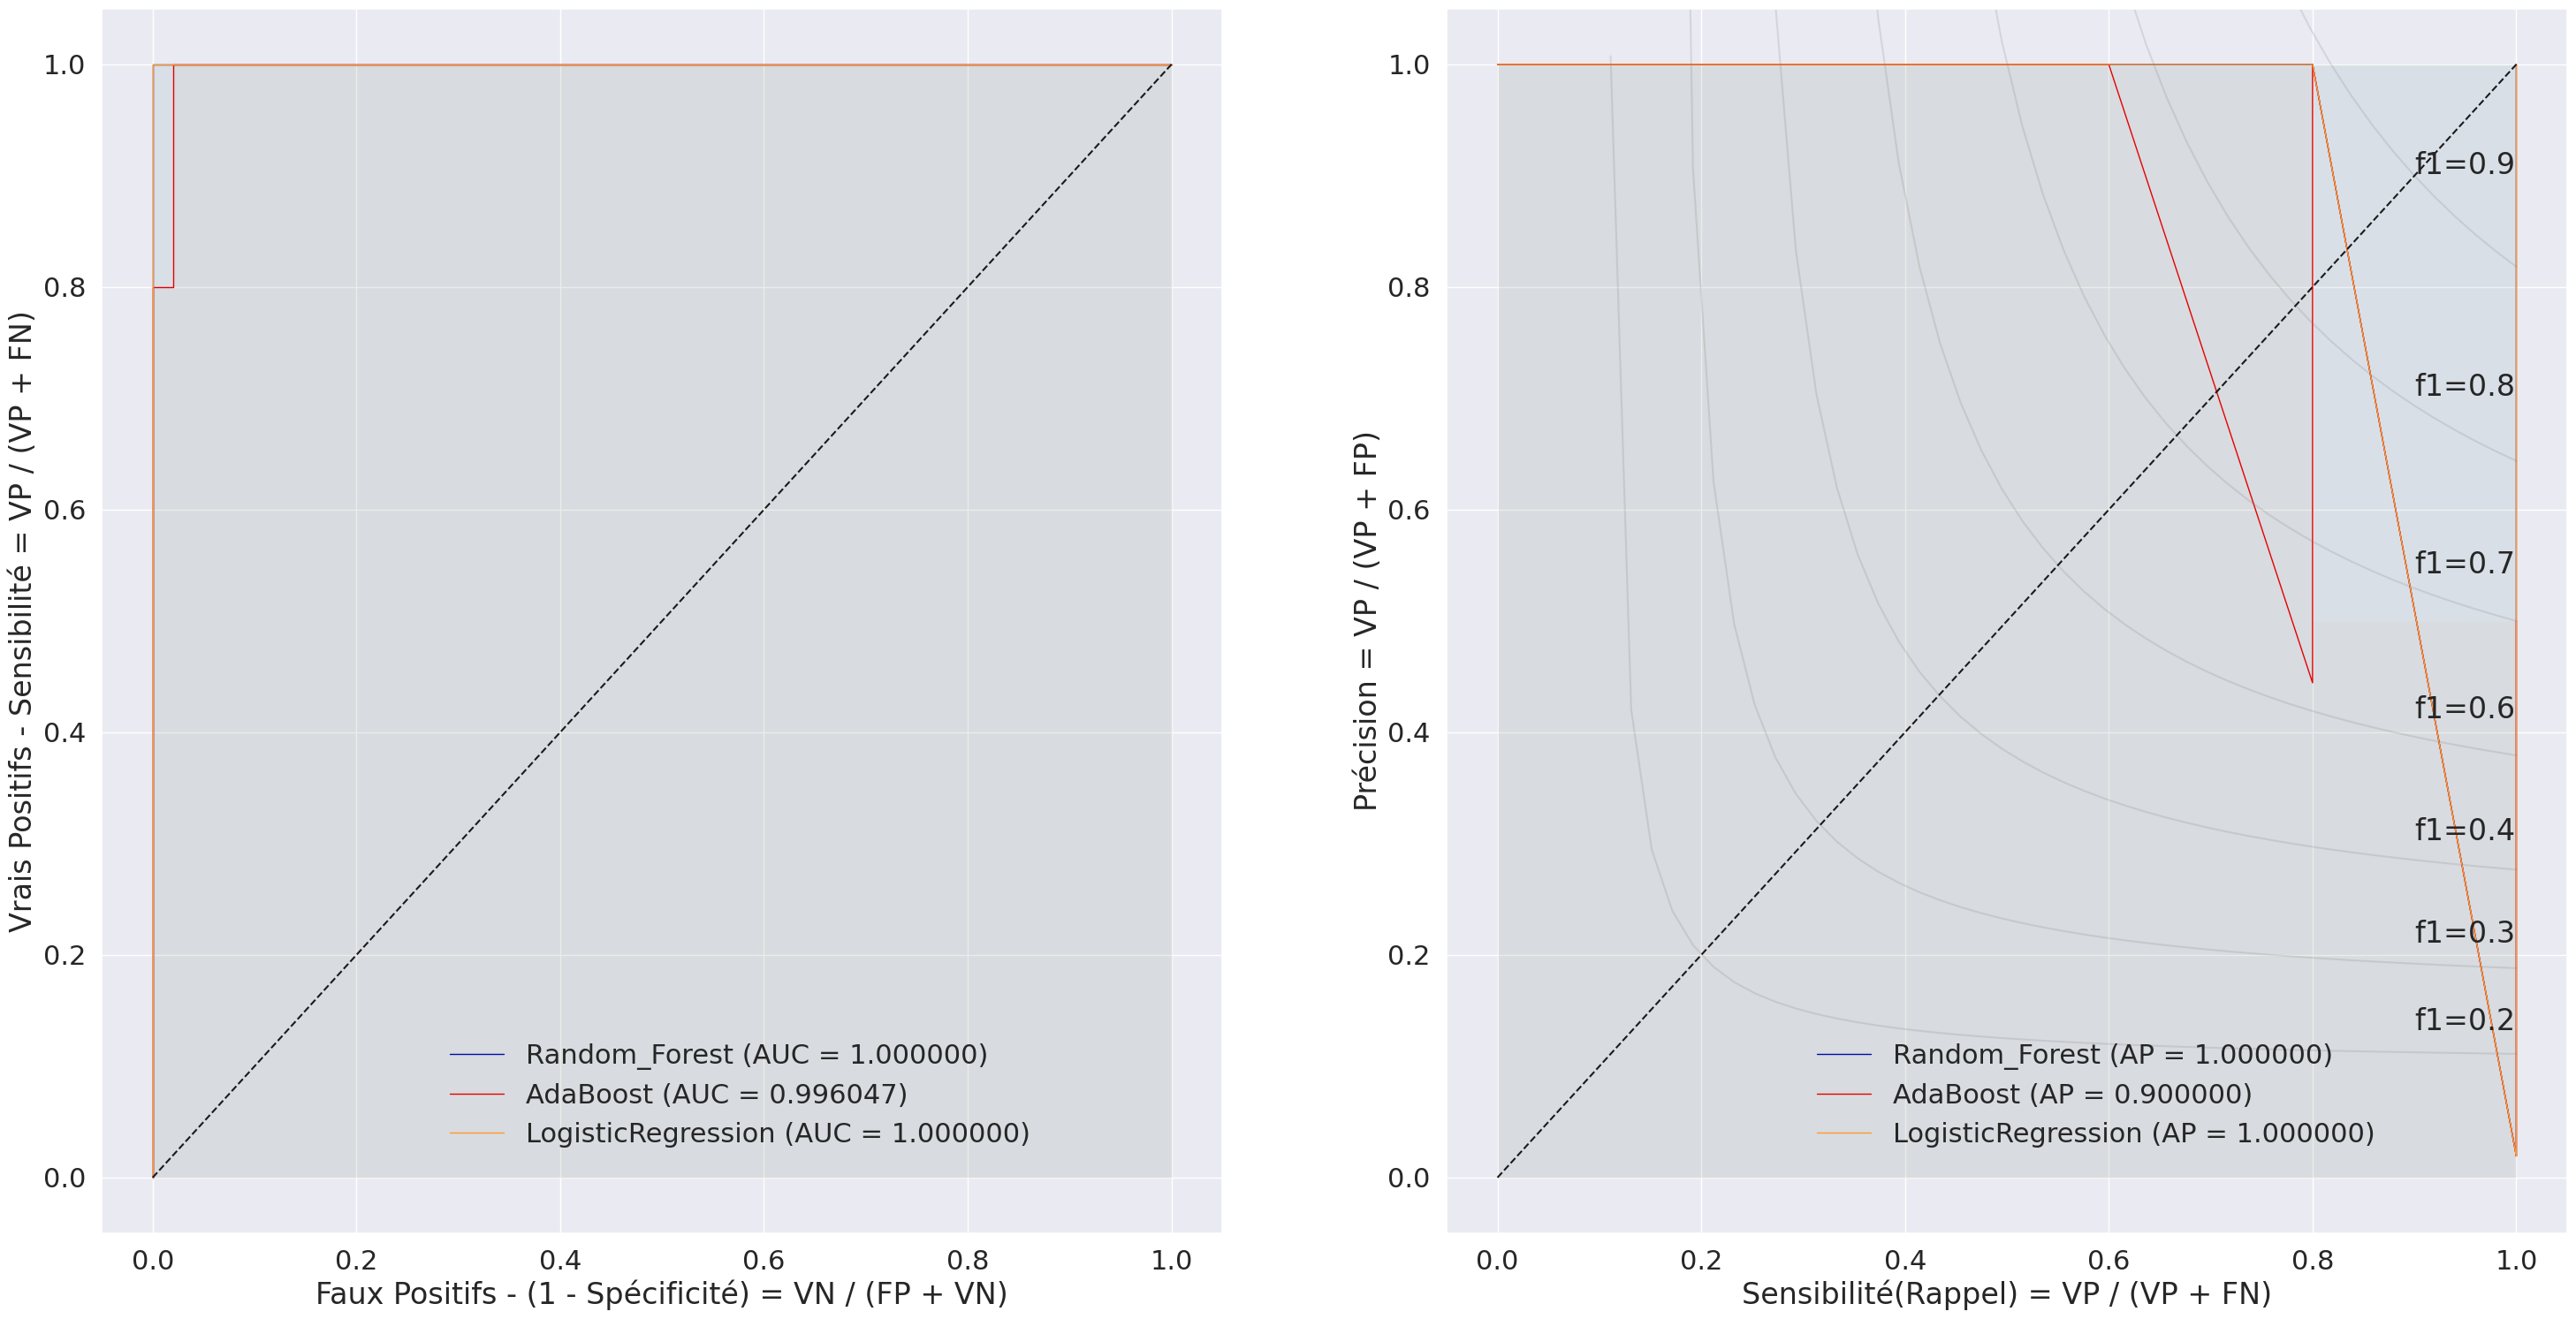

In [79]:
metriquesDFtemp,resultatsDFtemp,metriques,resultats  = \
              essaiApprentissageComparaisonClassificateurs( classificateursDict, 
                                                            X_train, 
                                                            y_train,
                                                            X_test, 
                                                            y_test, 
                                                            nom_essai='Optimisation',
                                                            apprentissage=True)
affichageCourbesROCetPR(metriques,resultats,classificateursDict)

In [80]:
metriquesDFtemp['échantillon'] = 'test'
metriquesDF = pd.concat([metriquesDF,metriquesDFtemp])
metriquesDF[metriquesDF['échantillon'] == 'test'].drop(columns=['vrais_positifs', 'vrais_negatifs',
                         'faux_positifs', 'faux_negatifs', 'fbeta05', 'fbeta2',
                         'hammingloss', 'matthews']).sort_values(['aucROC','f1'],ascending=False).head(28)

,avgPrecRec,aucROC,accuracy,logloss,precision,sensibilite,f1,jaccard,specificite,essai,échantillon
classicateur,,,,,,,,,,,
LogisticRegression,1.0,1.0,0.996124,0.139704,1.0,0.8,0.888889,0.8,1.0,Optimisation,test
LogisticRegression,1.0,1.0,0.992248,0.279408,1.0,0.6,0.75,0.6,1.0,Initial,test
LogisticRegression,1.0,1.0,0.992248,0.279408,1.0,0.6,0.75,0.6,1.0,Modalités,test
LogisticRegression,1.0,1.0,0.992248,0.279408,1.0,0.6,0.75,0.6,1.0,Modalités+StandardScaler,test
Random_Forest,1.0,1.0,0.992248,0.279408,1.0,0.6,0.75,0.6,1.0,Optimisation,test
Random_Forest,0.966667,0.999209,0.98062,0.69852,0.0,0.0,0.0,0.0,1.0,Modalités+StandardScaler,test
Random_Forest,0.926667,0.998419,0.984496,0.558816,1.0,0.2,0.333333,0.2,1.0,Initial,test
AdaBoost,0.925,0.997628,0.992248,0.279408,1.0,0.6,0.75,0.6,1.0,Modalités,test
AdaBoost,0.925,0.997628,0.992248,0.279408,1.0,0.6,0.75,0.6,1.0,Modalités+StandardScaler,test


# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Affichage des évolutions des métriques dans les essais</div></b> 

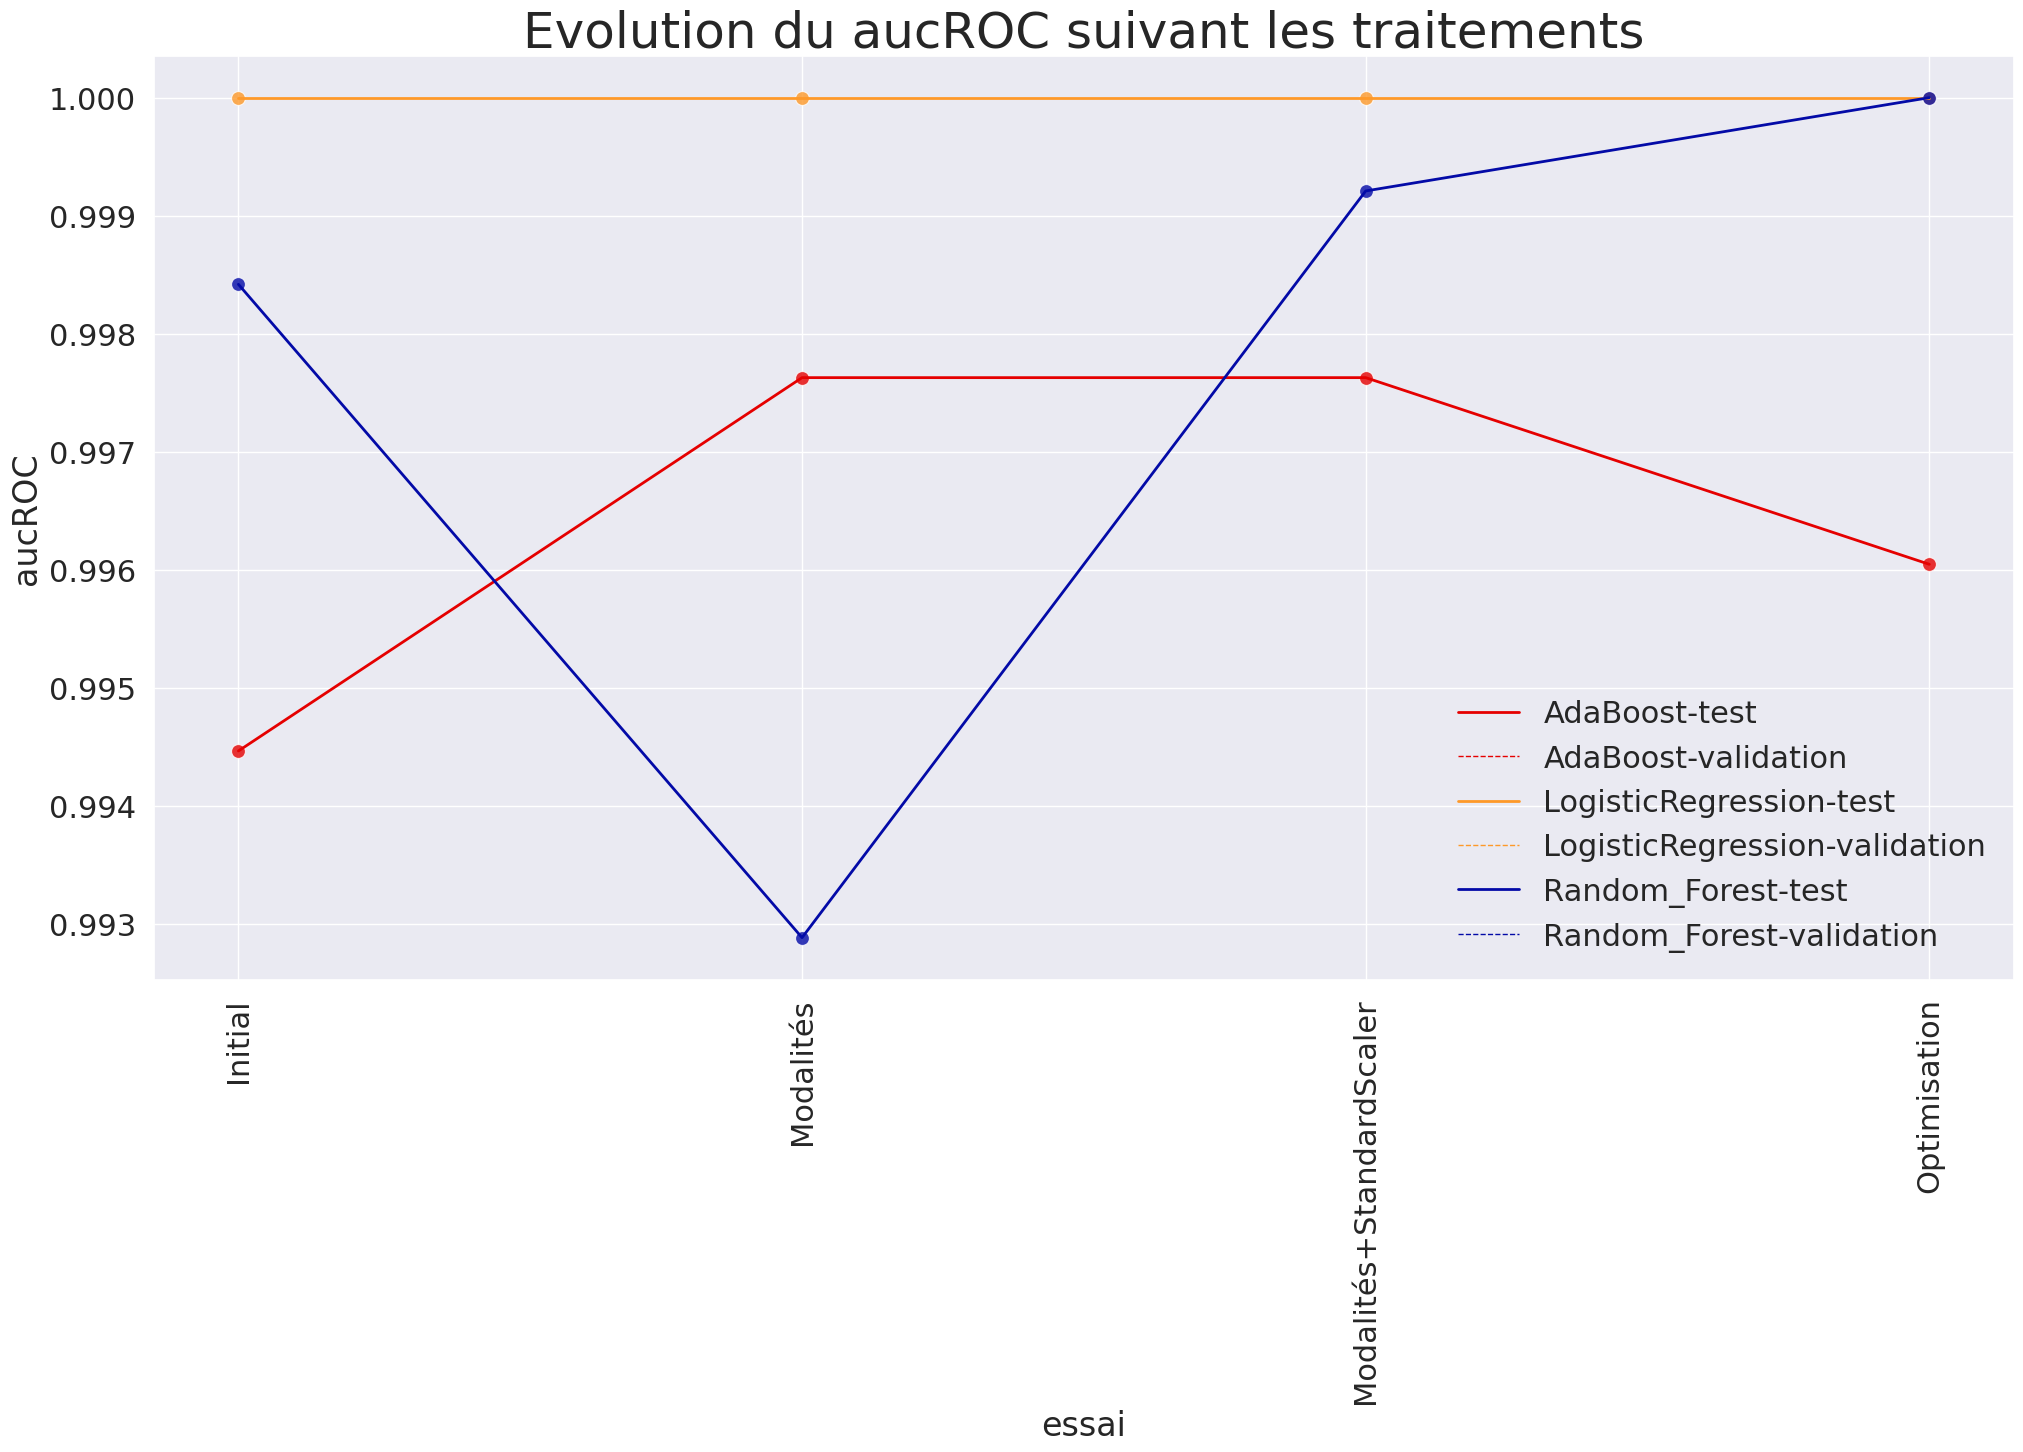

In [98]:
affichageEvolutionMetriquesTestVal(metriquesDF, 
                             metrique='aucROC', 
                             classificateursDict=classificateursDict,
                             rotation=90)

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Validation Croisée</div></b>

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/validationCroisee.png" width="800">

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>LogisticRegression</div></b>

In [88]:
nombreSeparations = 15
tailleTest = 0.3

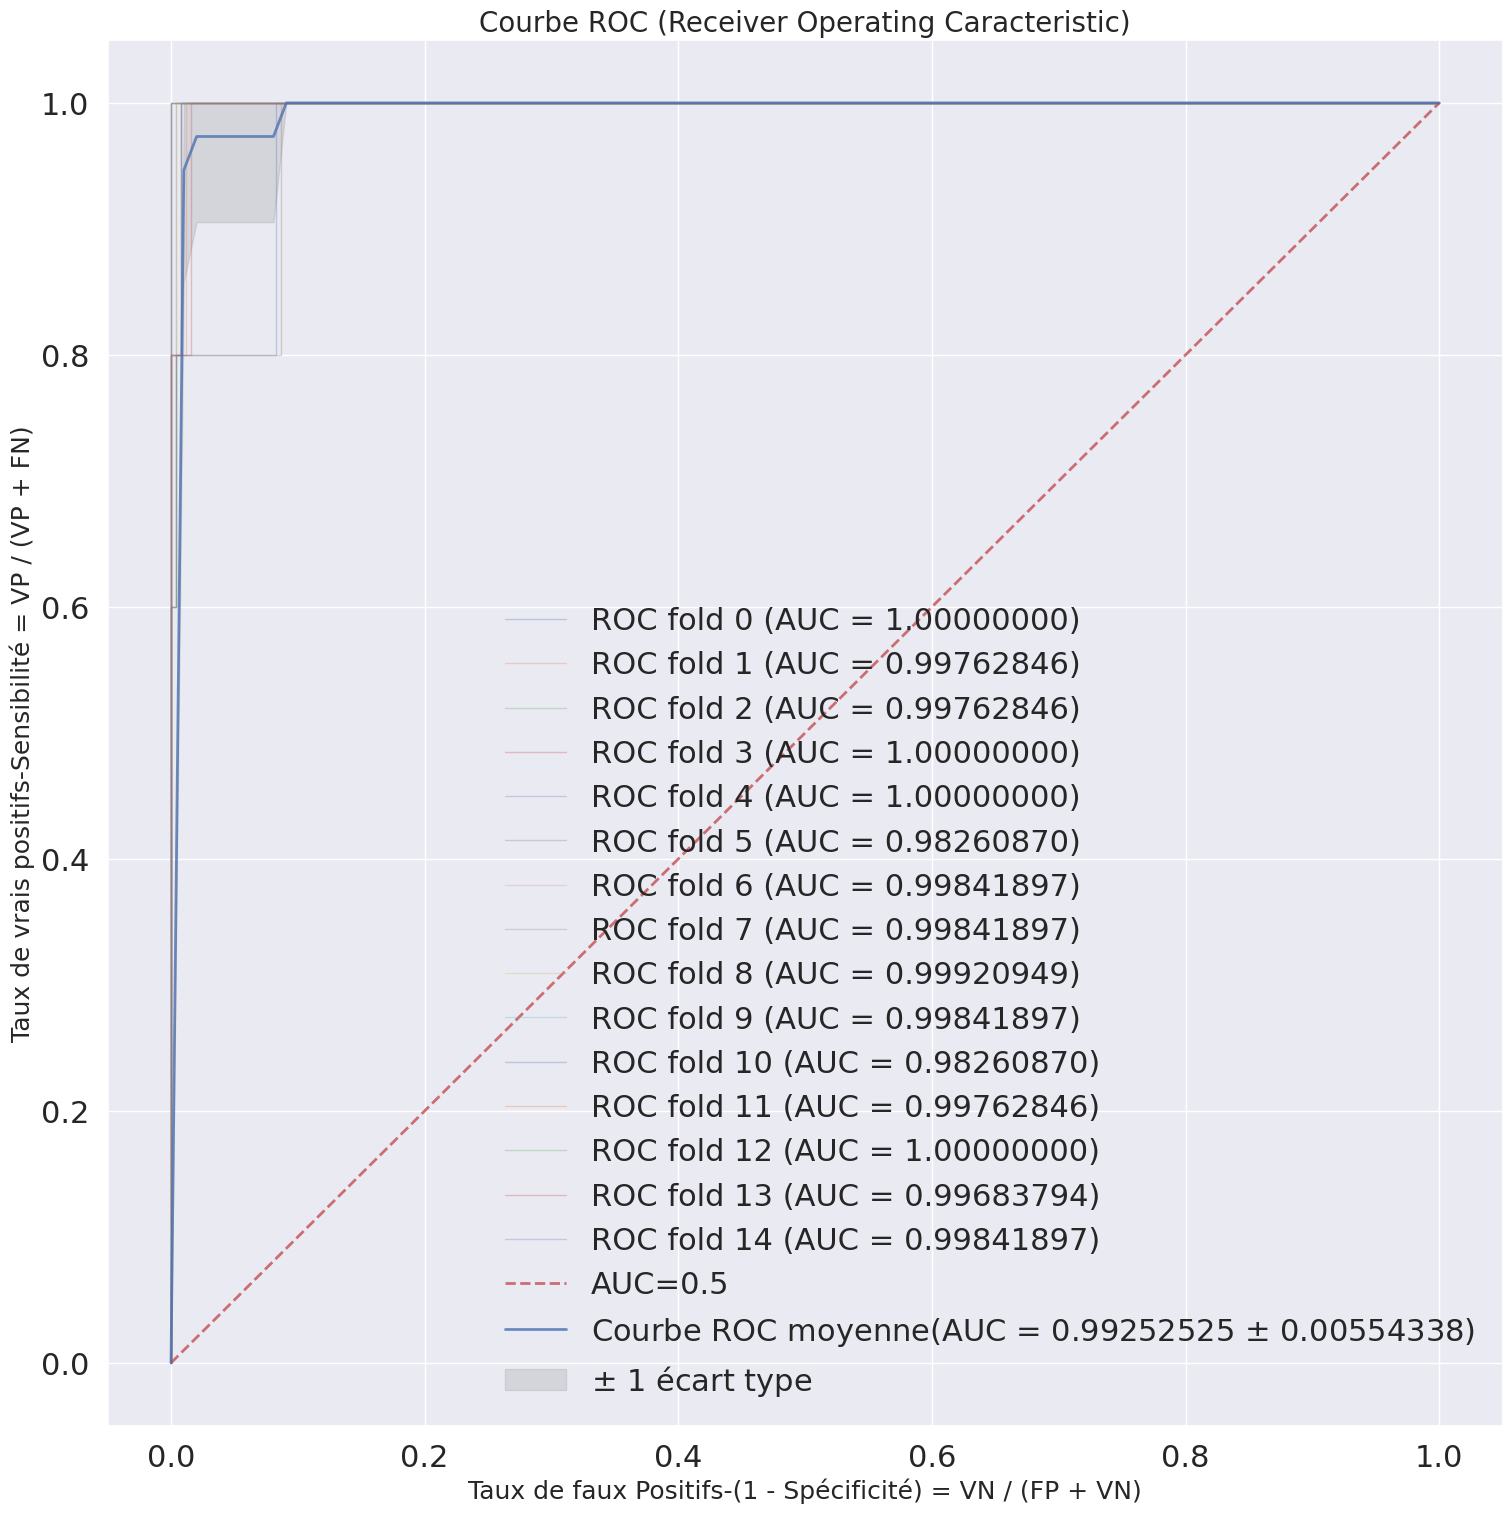

In [89]:
classificateursLG = executeValidationCroisee(X = X.values, 
                                           y = y.values, 
                                           classificateur=classificateursDict['LogisticRegression']['classicateur'],
                                           validation=StratifiedShuffleSplit(n_splits=nombreSeparations, test_size=tailleTest, random_state=0))

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Random Forest</div></b>

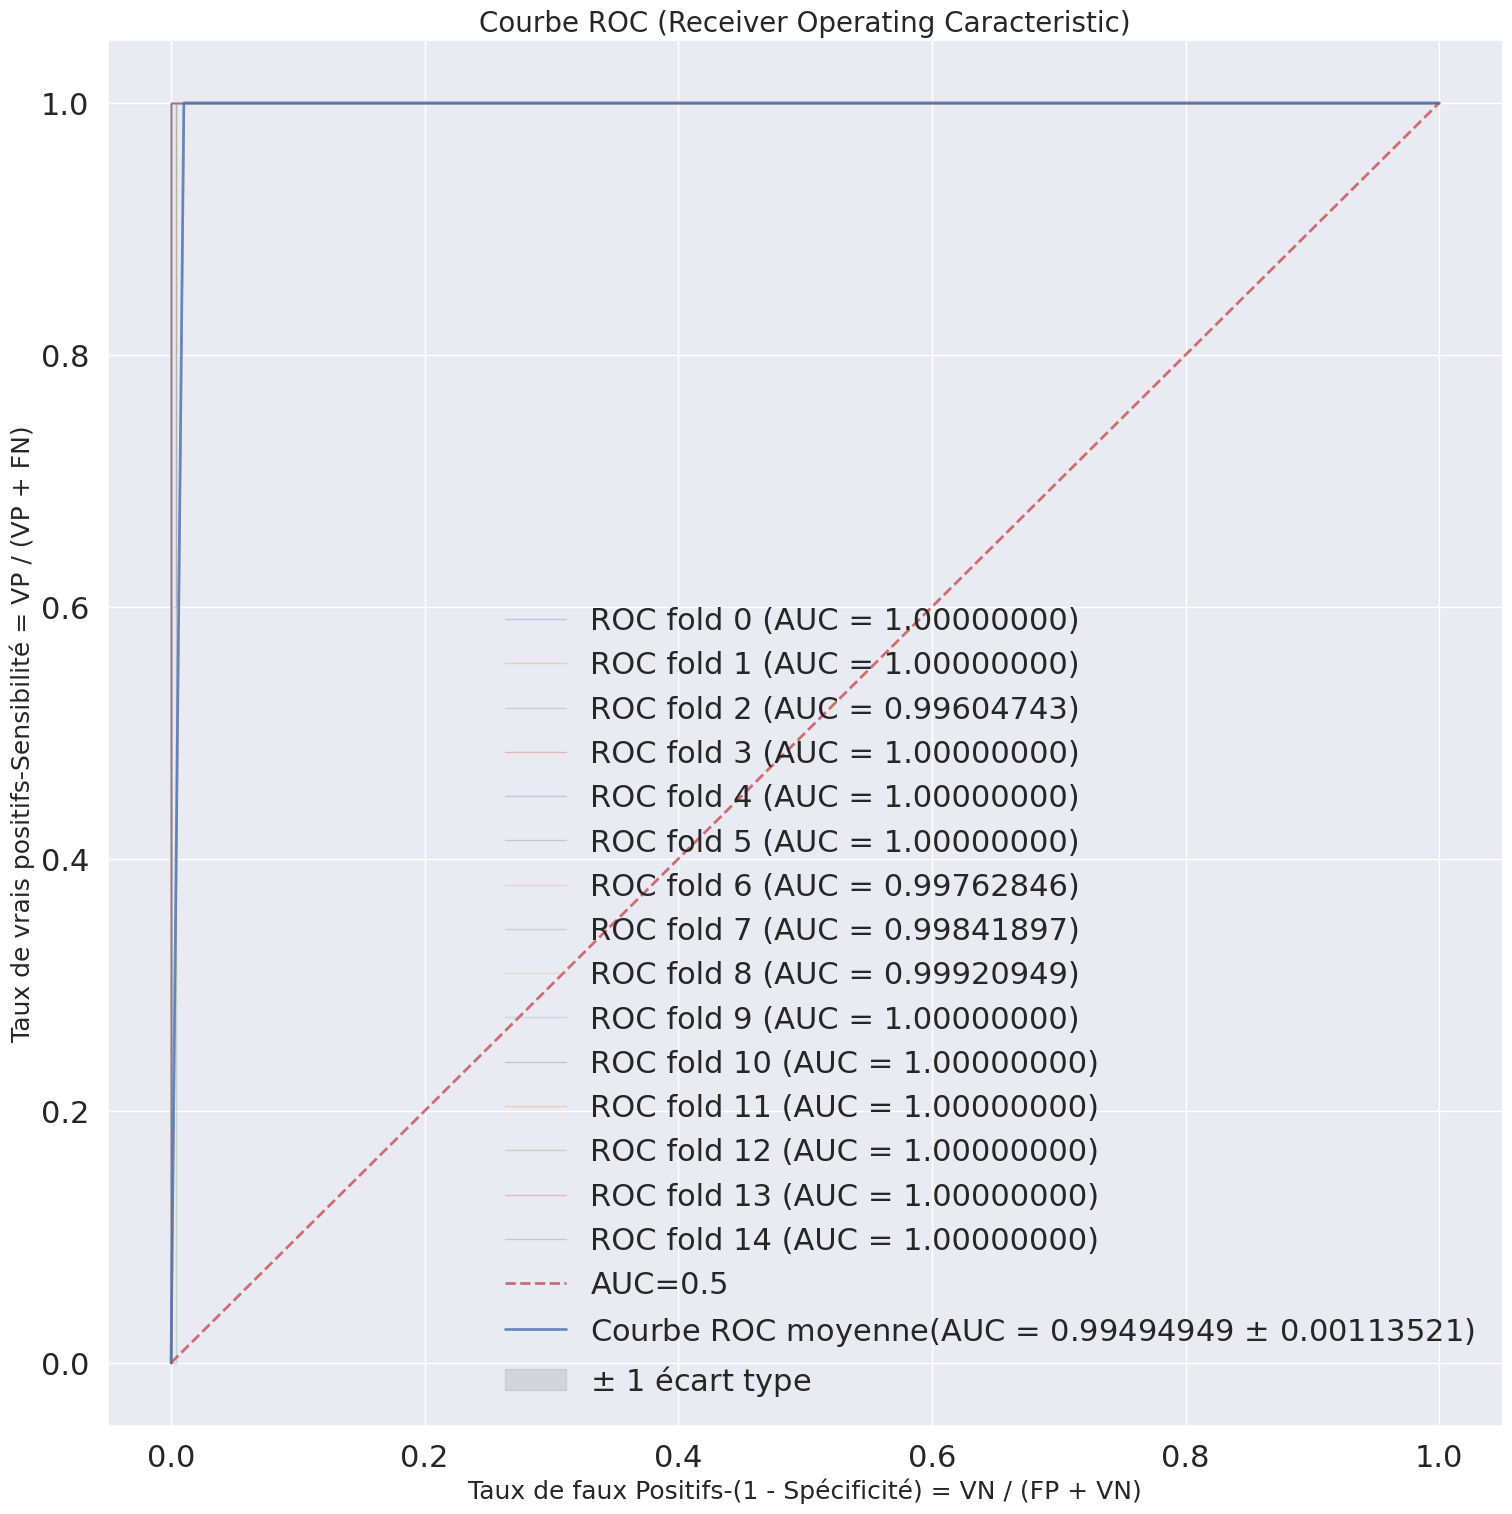

In [90]:
classificateursRF = executeValidationCroisee(X = X.values, 
                                             y = y.values, 
                                             classificateur=classificateursDict['Random_Forest']['classicateur'],
                                             validation=StratifiedShuffleSplit(n_splits=nombreSeparations, test_size=tailleTest, random_state=0))

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>AdaBoost</div></b>

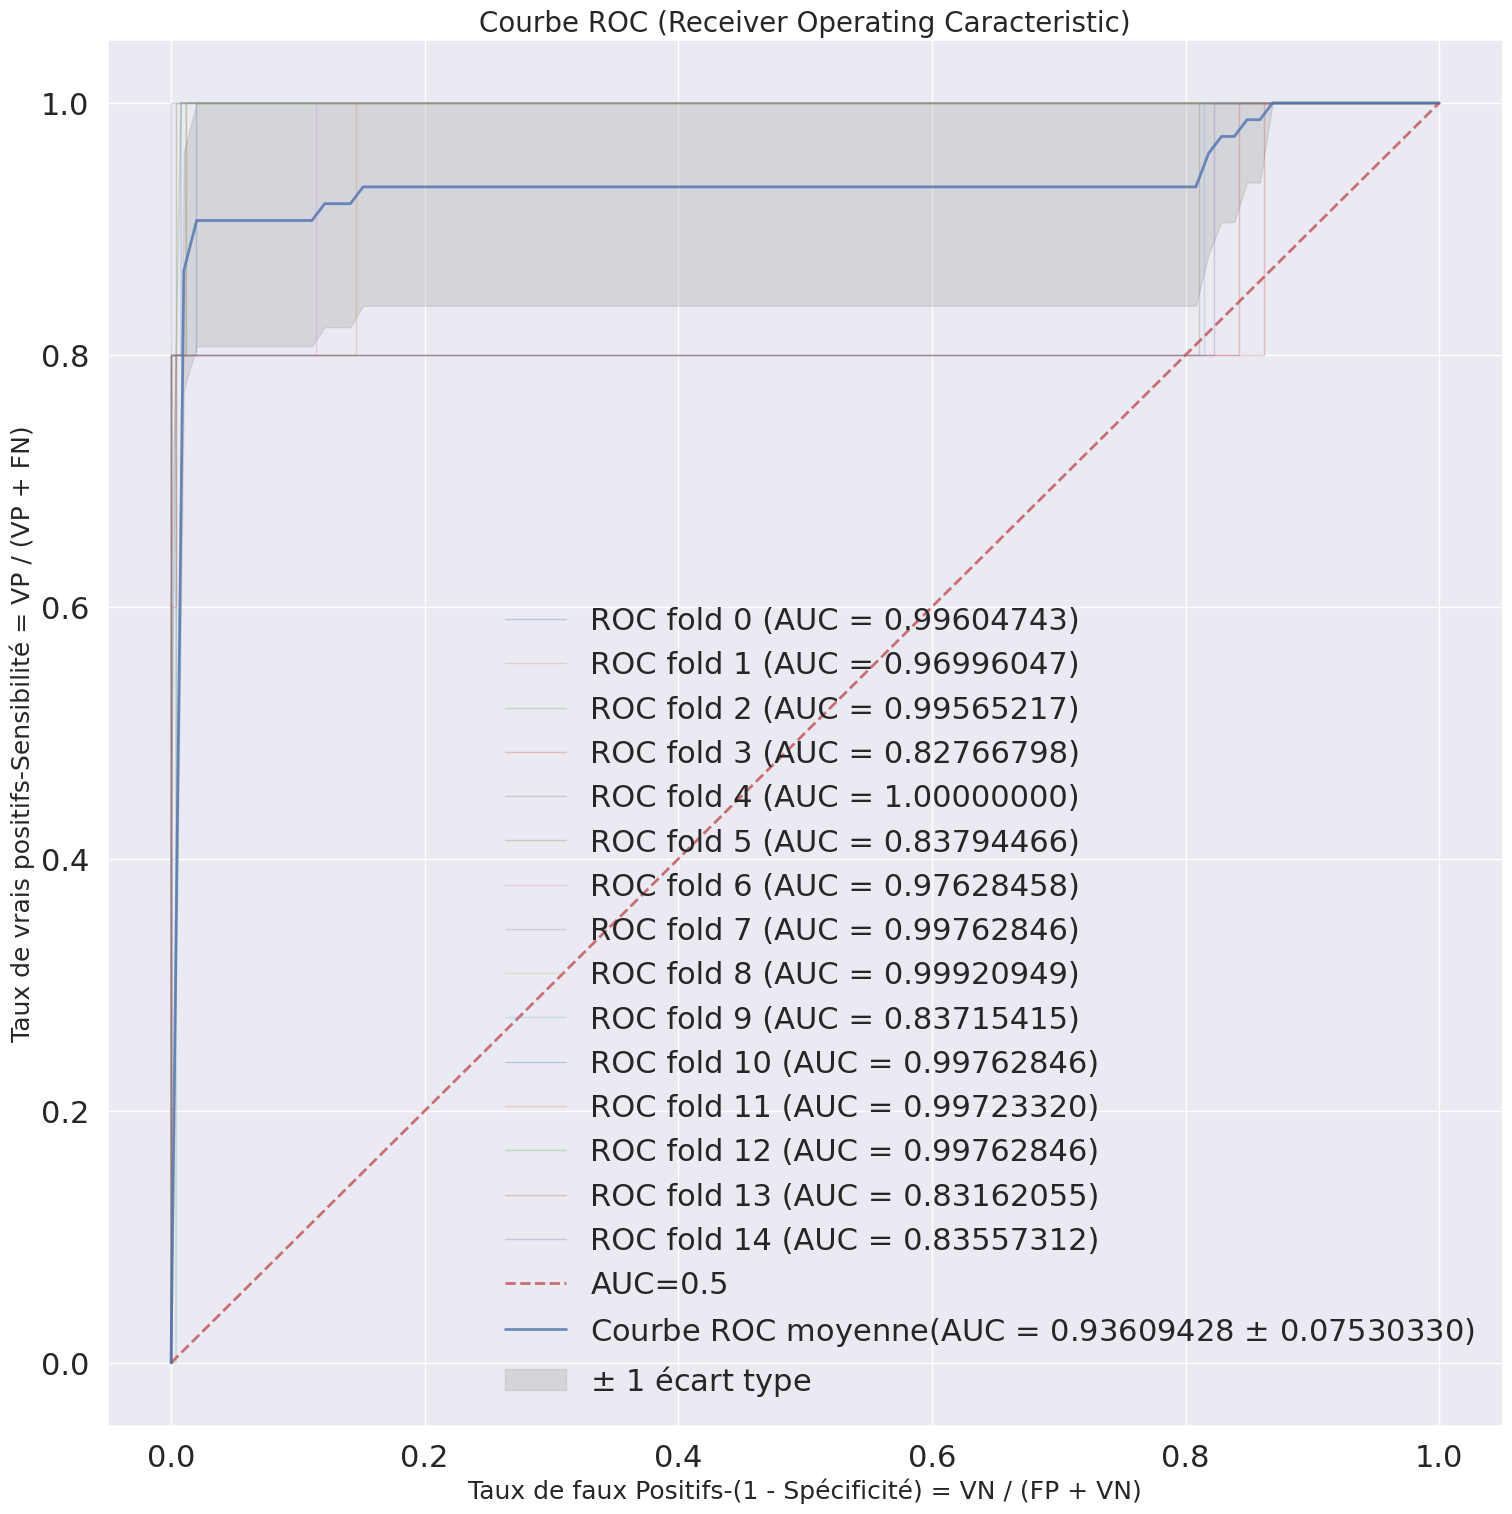

In [91]:
classificateursAD = executeValidationCroisee(X = X.values, 
                                             y = y.values, 
                                             classificateur=classificateursDict['AdaBoost']['classicateur'],
                                             validation=StratifiedShuffleSplit(n_splits=nombreSeparations, test_size=tailleTest, random_state=0))

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Multiples classificateurs du même type</div></b>

In [92]:
df = pd.DataFrame(data= y_test)
df.columns = ['y_test']
df['resultats'] = np.zeros(df.shape[0])

for i in range(nombreSeparations):
    df['resultats'] += classificateursRF[i].predict_proba(X_test)[:,1]

df['resultats'] /= nombreSeparations
df['y_pred'] = df.resultats.round().astype('int8')

df.head()

,,y_test,resultats,y_pred
index,Dx Cancer,,,
11,0,0,0.000861,0
13,0,0,0.000322,0
21,0,0,0.000893,0
26,0,0,0.001101,0
27,0,0,0.000263,0


In [93]:
pd.crosstab(df['y_pred'],df['y_test']).style.format("{:d}").background_gradient(cmap=plt.get_cmap('Blues'),axis=0)

y_test,0,1
y_pred,,
0,253,0
1,0,5


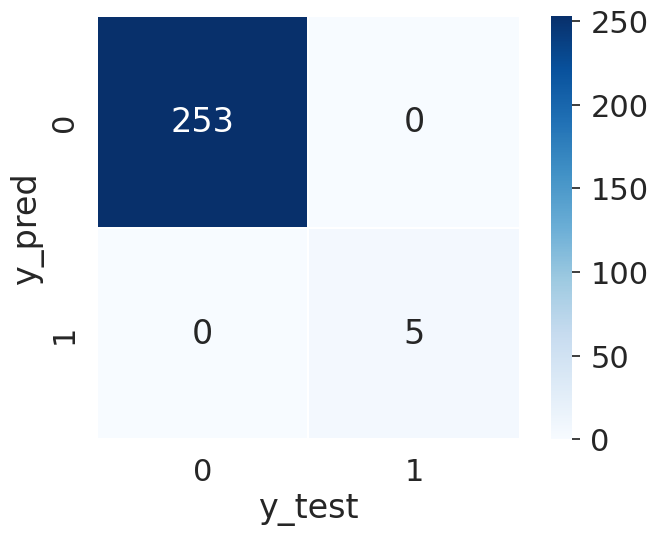

In [95]:
sns.heatmap(pd.crosstab(df['y_pred'],df['y_test']), 
            fmt= '.0f',
            linewidths=0.3,
            square=True, 
            cmap=plt.cm.Blues,
            linecolor='white', 
            annot=True,
            # xticklabels=[dictLabels[nom] for nom in range(2)], 
            # yticklabels=[dictLabels[nom] for nom in range(2)]
           );

In [96]:
def afficheMetrics(y_test,y_pred):
    accuracy                 = accuracy_score (y_test,y_pred)
    logloss                  = log_loss       (y_test,y_pred)
    hammingloss              = hamming_loss   (y_test,y_pred)
    precision                = precision_score(y_test,y_pred)
    sensibilite              = recall_score   (y_test,y_pred)
    f1                       = f1_score       (y_test,y_pred)
    jaccard_similarity       = jaccard_score  (y_test,y_pred)
    print(
          " Accuracy           : %.2f%%\n" % (accuracy * 100.0),       
          "logloss            : %.6f\n" % logloss           ,
          "hammingloss        : %.6f\n" % hammingloss       ,
          "precision          : %.6f\n" % precision         ,
          "sensibilite        : %.6f\n" % sensibilite       ,
          "f1                 : %.6f\n" % f1                ,
          "jaccard_similarity : %.6f\n" % jaccard_similarity
         )
    return accuracy,logloss,hammingloss,precision,sensibilite,f1,jaccard_similarity

In [97]:
metriques = afficheMetrics(df.y_test,df.y_pred)

 Accuracy           : 100.00%
 logloss            : 0.000000
 hammingloss        : 0.000000
 precision          : 1.000000
 sensibilite        : 1.000000
 f1                 : 1.000000
 jaccard_similarity : 1.000000

